### Importing neccessary libraries:

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data file:

In [57]:
wine_red = pd.read_csv("winequality-red.csv")

In [58]:
wine_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


The file seems to be seperated by `;`, so we will re-import it with the `sep` parameter of the `pd.read_csv()` function.

In [59]:
df = pd.read_csv("winequality-red.csv", sep=';')

In [60]:
# print first 5 rows of dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
# print statistical summary
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* Total rows = 1599
* Features = 10, dtype - float
* Target = 1, dtype - int64

We can see that all feature columns are of float datatype while the target column is of int datatype. Both are continuous.
Since the output variable is continuous and we have to predict the quality of the wine on a scale of 1 to 10, we will treat this as a regression problem.

### Performing EDA:

In [63]:
# Print datatypes of all columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Since all the features are numerical, we do not need to worry about encoding categorical values.

In [64]:
# Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the dataset.

In [65]:
n = df.shape[1]


### Data Vizualization:

#### Univariate Plotting

<Axes: xlabel='quality', ylabel='count'>

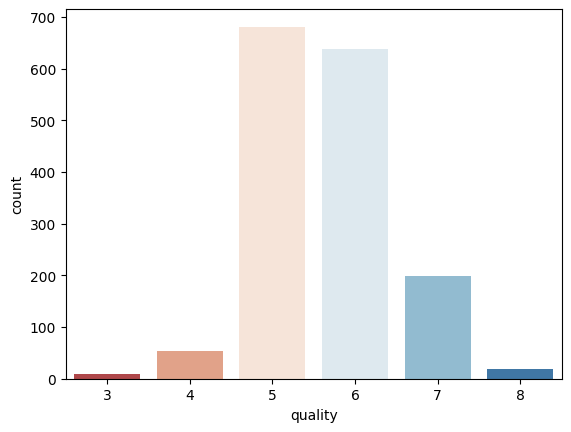

In [66]:
# Countplot of target feature

sns.countplot(data=df, x='quality', palette='RdBu')

In [108]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can see that the dataset is highly imbalanced.
Number of samples of quality 5 and 6 are way more (\~1300) compared to the other qualities(\~300).  
This imbalance will lead the model to be biased towards samples of average quality wine and hence make inaccurate predictions.  
To solve this issue we can use SMOTE library to synthetically create samples of the minority classes.

Plotting histogram for all features

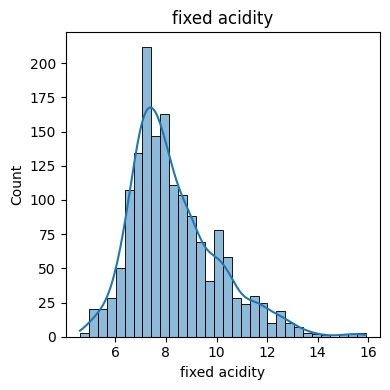

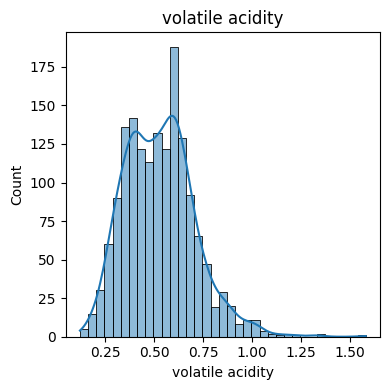

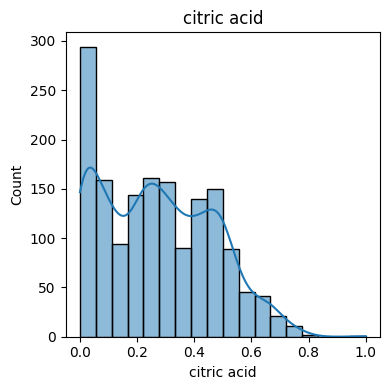

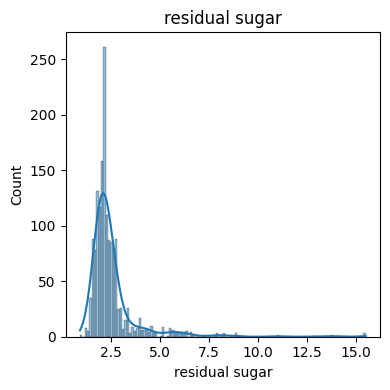

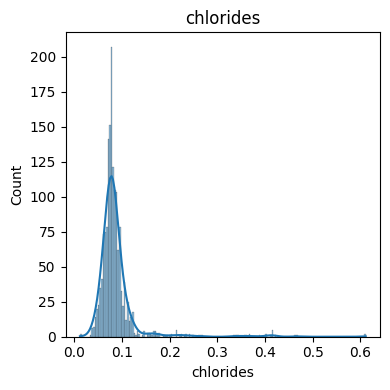

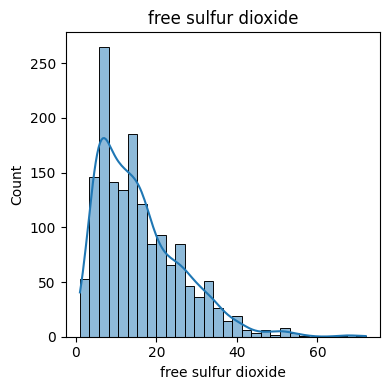

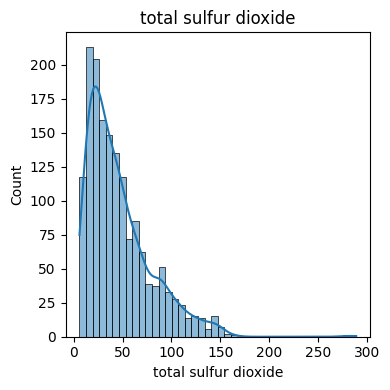

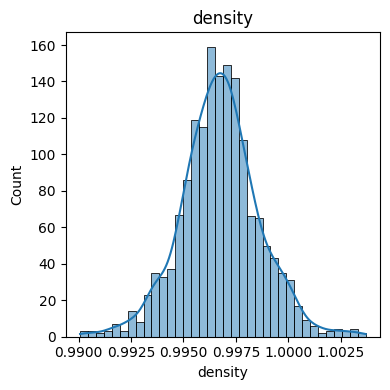

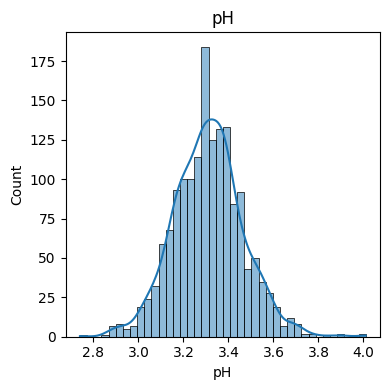

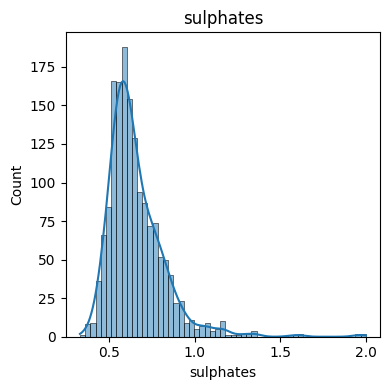

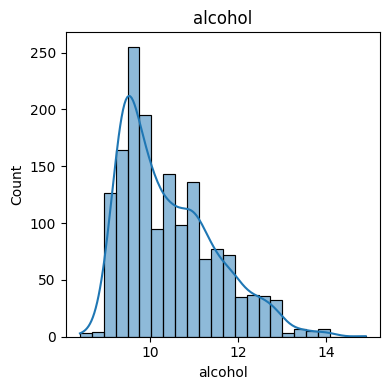

In [67]:
for i in range(0, n-1):
    plt.figure(figsize=(4, 4))
    plt.title(df.columns[i])
    sns.histplot(df.iloc[:, i], kde=True)
    plt.tight_layout()
    plt.show()

We can see that most of the features are not normally distributed. Some of them are left skewed.

Plotting boxplots of all features


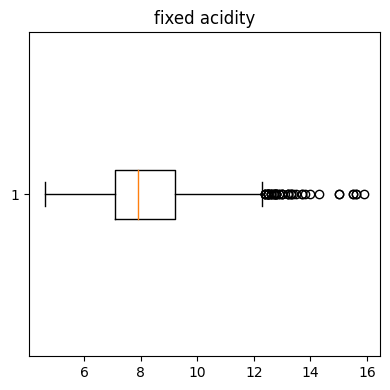

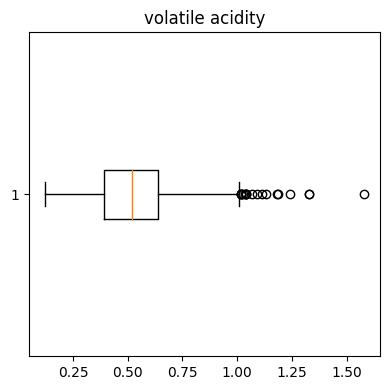

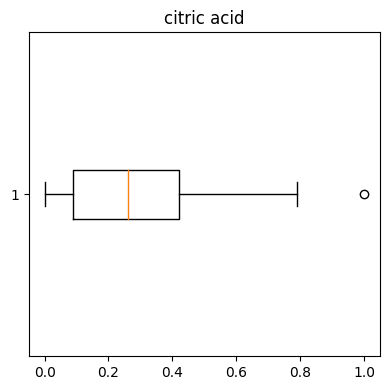

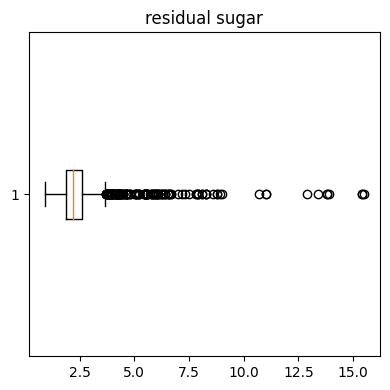

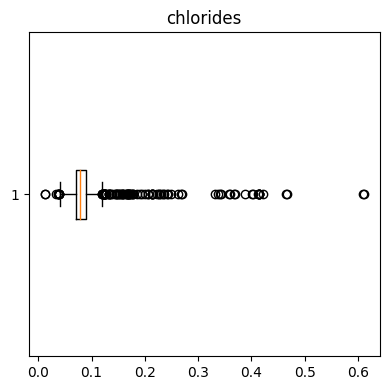

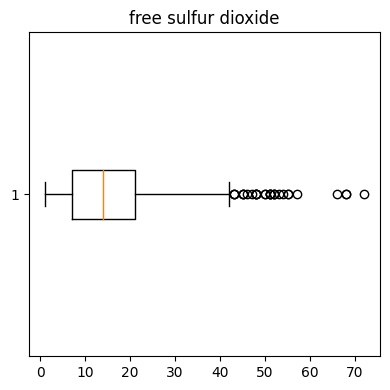

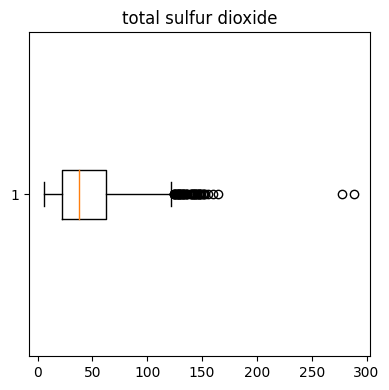

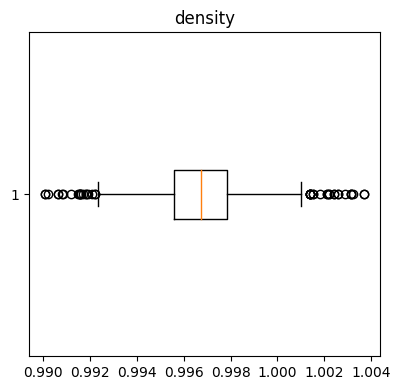

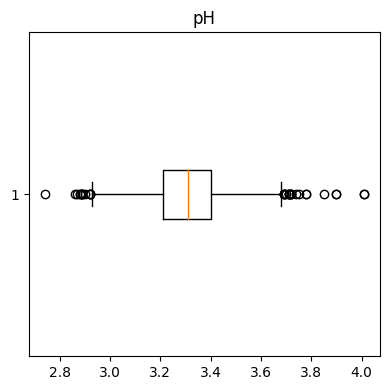

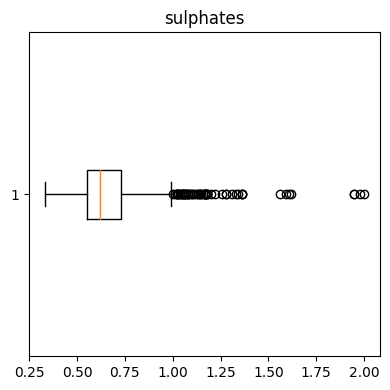

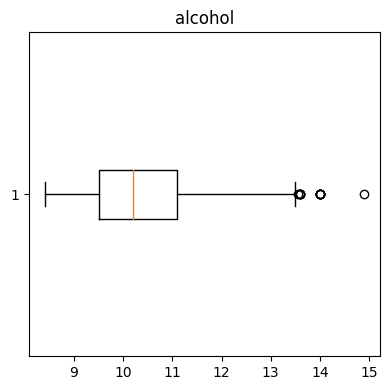

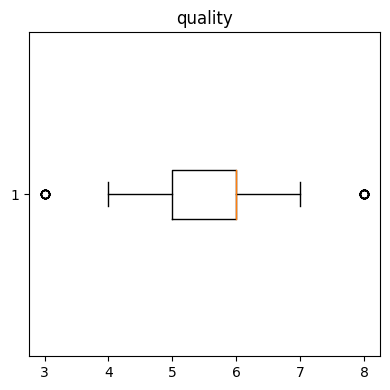

In [68]:
for i in range(0, n):
    plt.figure(figsize=(4, 4))
    plt.title(df.columns[i])
    plt.boxplot(df.iloc[:, i], vert=False)
    plt.tight_layout()
    plt.show()

Outliers are present in all the features.  
However it is difficult to ascertain whether these are errors in measurement or a characterstic of the data, hence we will not remove them at this point.

#### Multivariate plotting

Plotting target v/s features:

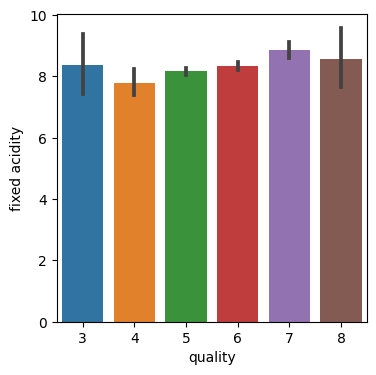

In [69]:
# Fixed acidity v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='fixed acidity')
plt.show()

All qualities of wine have similar fixed acidity values.

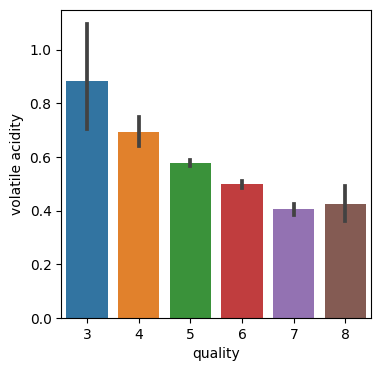

In [70]:
# Volatile acidity v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='volatile acidity')
plt.show()

Higher quality wines have lower volatile acidity(inversely proportional).

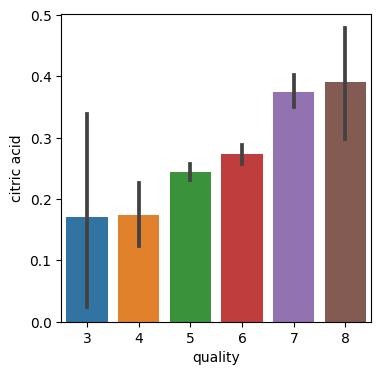

In [71]:
# Citric acid v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='citric acid')
plt.show()

Higher quality wines have higher citric acid content(directly proportional).

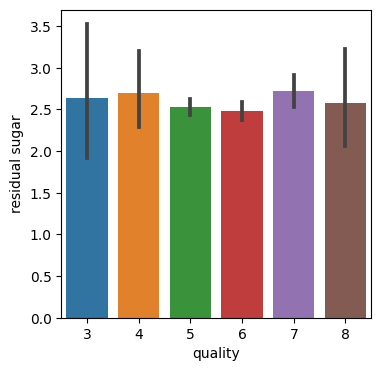

In [72]:
# Residual sugar v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='residual sugar')
plt.show()

All qualities of wine have similar residual sugar values.

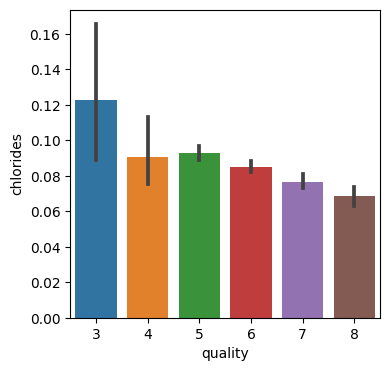

In [73]:
# Chlorides v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='chlorides')
plt.show()

Higher quality wines have lower chlorides(inversely proportional).

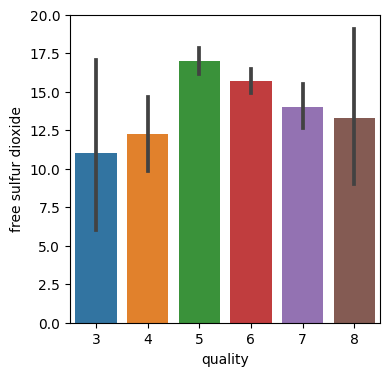

In [74]:
# Free sulfur dioxide v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='free sulfur dioxide')
plt.show()

Free sulfur dioxide does not show a linear relationship with the quality of the wine.

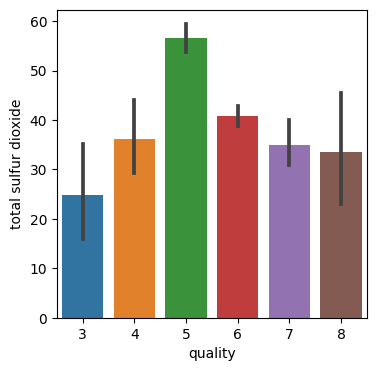

In [75]:
# Total sulfur dioxide v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='total sulfur dioxide')
plt.show()

Total sulfur dioxide does not show a linear relationship with the quality of the wine.

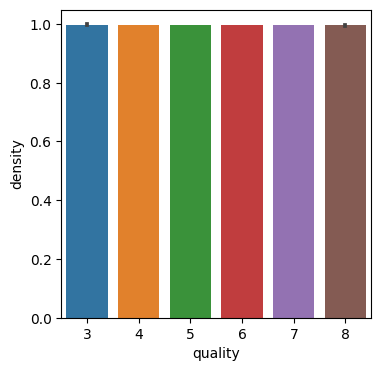

In [76]:
# Density v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='density')
plt.show()

All quality of wines seem to have the same density.

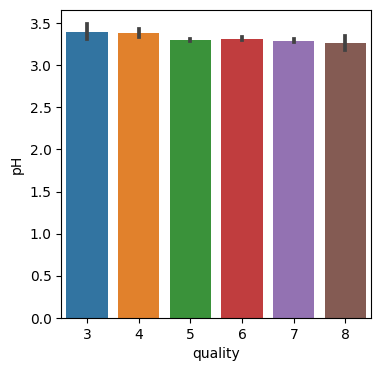

In [77]:
# pH v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='pH')
plt.show()

All quality of wines seem to have the same pH.

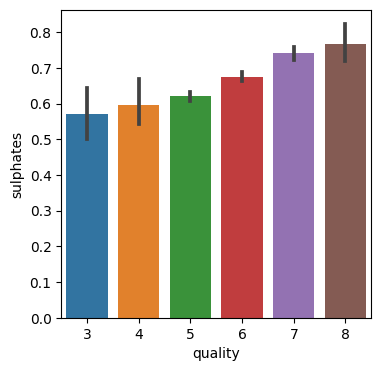

In [78]:
# Sulphates v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='sulphates')
plt.show()

Higher quality wines have higher level of sulphates(directly proportional).

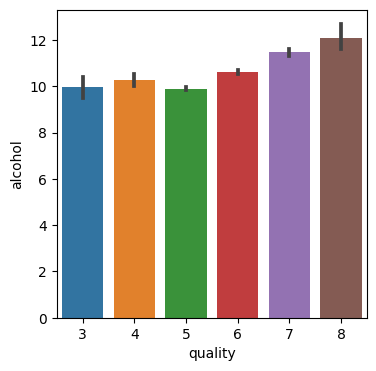

In [79]:
# Alcohol v/s Quality

plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='quality', y='alcohol')
plt.show()

Higher quality wines have higher level of alcohol(directly proportional).

---



Plotting correlation heatmap

<Axes: >

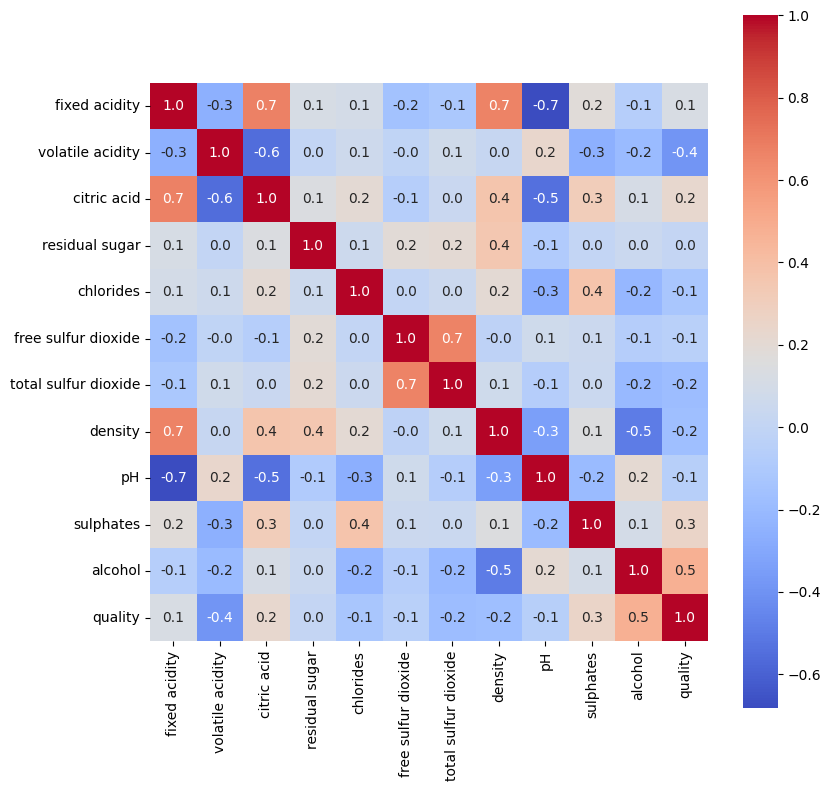

In [80]:
corr = df.corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True, fmt='.1f', square=True, cmap='coolwarm')

### Seperating data into X and y variables:

In [81]:
X = df.drop('quality', axis=1)
y = df['quality']

In [82]:
X.shape

(1599, 11)

In [83]:
y.shape

(1599,)

## Before applying Smote

### Splitting data using train_test_split:

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1279, 11) (320, 11)
(1279,) (320,)


### Performing feature scaling:

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
print(f"Shape of X_train_scaled = {X_train_scaled.shape}")
print(f"Shape of X_test_scaled = {X_test_scaled.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train_scaled = (1279, 11)
Shape of X_test_scaled = (320, 11)
Shape of y_train = (1279,)
Shape of y_test = (320,)


In [87]:
# importing linear regression model

from sklearn.linear_model import LinearRegression

# training model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#predicting test dataset values with model
y_pred = model.predict(X_test_scaled)

In [88]:
# importing model evaluation metrics

from sklearn.metrics import mean_squared_error, r2_score

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = (np.sqrt(test_mse))
test_r2_score = r2_score(y_test, y_pred)

In [89]:
# printing evaluation metrics

print("MSE: ", test_mse)
print("RMSE: ", test_rmse)
print("R2 Score: ", test_r2_score)

MSE:  0.390025143963955
RMSE:  0.624519930798013
R2 Score:  0.40318034127962177


The MSE of the model is 0.3900, which is good.  
The RMSE of the model is 0.6245, which is good.  
The R2 score of the model is 0.4031, also low, not good.

In [90]:
# Printing coefficients of model to determine most important feature

model.coef_

array([ 0.03978916, -0.17943891, -0.02751248,  0.00942128, -0.08908432,
        0.05801491, -0.12000836, -0.01920444, -0.06061037,  0.14681503,
        0.2966275 ])

The highest coefficient(weight) is of the feature 'alcohol', hence it can be considered as the most important feature.

We will use SMOTE to oversample the minority class and see if that makes a difference.

## After applying SMOTE

In [91]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [92]:
print(X_resampled.shape, y_resampled.shape)

(4086, 11) (4086,)


In [93]:
# Checking number of samples of each quality

y_resampled.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

We can see that now eack quality has equal number of samples.  

Now we will train linear regression model again.

In [94]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test \
= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_resampled_train.shape, X_resampled_test.shape)
print(y_resampled_train.shape, y_resampled_test.shape)

(3268, 11) (818, 11)
(3268,) (818,)


In [95]:
scaler = StandardScaler()
scaler.fit(X_resampled_train)
X_resampled_train_scaled = scaler.transform(X_resampled_train)
X_resampled_test_scaled = scaler.transform(X_resampled_test)

In [96]:
print(f"Shape of X_resampled_train_scaled = {X_resampled_train_scaled.shape}")
print(f"Shape of X_resampled_test_scaled = {X_resampled_test_scaled.shape}")
print(f"Shape of y_resampled_train = {y_resampled_train.shape}")
print(f"Shape of y_resampled_test = {y_resampled_test.shape}")

Shape of X_resampled_train_scaled = (3268, 11)
Shape of X_resampled_test_scaled = (818, 11)
Shape of y_resampled_train = (3268,)
Shape of y_resampled_test = (818,)


In [97]:
# instantiating new model

model_2 = LinearRegression()
model_2.fit(X_resampled_train_scaled, y_resampled_train)

#predicting test dataset values with model
y_resampled_pred = model_2.predict(X_resampled_test_scaled)

In [98]:
# calculating model evaluation metrics

test_mse_resampled = mean_squared_error(y_resampled_test, y_resampled_pred)
test_rmse_resampled = (np.sqrt(test_mse_resampled))
test_r2_score_resampled = r2_score(y_resampled_test, y_resampled_pred)

In [99]:
# printing evaluation metrics

print("MSE of model_2: ", test_mse_resampled)
print("RMSE of model_2: ", test_rmse_resampled)
print("R2 Score of model_2: ", test_r2_score_resampled)

MSE of model_2:  0.7957727331464969
RMSE of model_2:  0.8920609469910096
R2 Score of model_2:  0.716269279143594


MSE of model_2 is 0.7761, which is higher than before.

RMSE of model_2 is 0.8980, which is higher than before but acceptable.  

R2 Score of model_2 is 0.7124, which is better than before we had resampled the data.

In [100]:
#Printing coefficients of model to determine most important feature

model_2.coef_

array([-0.25824468, -0.55543441,  0.02931476, -0.10009437, -0.340778  ,
        0.02999665, -0.02022286,  0.03404651, -0.52450495,  0.26515611,
        0.83719904])

The highest coefficient(weight), again, is of the feature 'alcohol', hence it can be considered as the most important feature.

Our R2 score is still not as good as expected so we will try to apply polynomial regression to the resampled data.

### Polynomial regression

In [101]:
# importing polynomial features

from sklearn.preprocessing import PolynomialFeatures
poly_degree = 2 # hyperparameter
poly = PolynomialFeatures(degree=poly_degree)
X_poly = poly.fit_transform(X_resampled)

# y_resampled is not transformed, just reassigning to new variable so it is easier to keep track
y_poly = y_resampled

In [102]:
# train test split

X_poly_train, X_poly_test, y_poly_train, y_poly_test \
= train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

print(X_poly_train.shape, X_poly_test.shape)
print(y_poly_train.shape, y_poly_test.shape)

(3268, 78) (818, 78)
(3268,) (818,)


In [103]:
scaler = StandardScaler()
scaler.fit(X_poly_train)
X_poly_train_scaled = scaler.transform(X_poly_train)
X_poly_test_scaled = scaler.transform(X_poly_test)

In [104]:
print(f"Shape of X_poly_train_scaled = {X_poly_train_scaled.shape}")
print(f"Shape of X_poly_test_scaled = {X_poly_test_scaled.shape}")
print(f"Shape of y_poly_train = {y_poly_train.shape}")
print(f"Shape of y_poly_test = {y_poly_test.shape}")

Shape of X_poly_train_scaled = (3268, 78)
Shape of X_poly_test_scaled = (818, 78)
Shape of y_poly_train = (3268,)
Shape of y_poly_test = (818,)


In [105]:
# instantiating polynomial model

model_3 = LinearRegression()
model_3.fit(X_poly_train_scaled, y_poly_train)

#predicting test dataset values with model
y_poly_pred = model_3.predict(X_poly_test_scaled)

In [106]:
# calculating model evaluation metrics

test_mse_poly = mean_squared_error(y_poly_test, y_poly_pred)
test_rmse_poly = (np.sqrt(test_mse_poly))
test_r2_score_poly = r2_score(y_poly_test, y_poly_pred)

In [107]:
# printing evaluation metrics
print("MSE of model_3 ", test_mse_poly)
print("RMSE of model_3: ", test_rmse_poly)
print("R2 Score of model_3: ", test_r2_score_poly)

MSE of model_3  0.5947839913070305
RMSE of model_3:  0.7712224006776712
R2 Score of model_3:  0.7879312979974564


MSE of model_3 is 0.5800

RMSE of model_3 is 0.7616, which is lower than using the resampled data.  

R2 Score of model_3 is 0.7931, which is better than using the resampled data.